In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [2]:
BAC = data.DataReader('BAC','yahoo',start=datetime(2006, 1, 1), end=datetime(2016, 1, 1))
C = data.DataReader('C','yahoo',start=datetime(2006, 1, 1), end=datetime(2016, 1, 1))
GS = data.DataReader('GS','yahoo',start=datetime(2006, 1, 1), end=datetime(2016, 1, 1))

In [3]:
JPM = data.DataReader('JPM','yahoo',start=datetime(2006, 1, 1), end=datetime(2016, 1, 1))
MS = data.DataReader('MS','yahoo',start=datetime(2006, 1, 1), end=datetime(2016, 1, 1))
WFC = data.DataReader('WFC','yahoo',start=datetime(2006, 1, 1), end=datetime(2016, 1, 1))

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys= tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364227  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009903  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052422  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002827  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024078  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224957  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249115  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345783  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382019  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756565  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104460  
2006-01-04   31.799999  31.530001  10870000.0  19.871273  
2006-01-05   31.500000  31.495001  10158000.0  19.849209  
2006-01-06   31.580000  31.680000   8403800.0  19.965805  
2006-01-09   31.674999  31.674999   5619600.0  19.962650  

[5 rows x 36 columns]

In [8]:
bank_stocks.xs('Close', axis=1, level=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [9]:
returns = pd.DataFrame()

In [10]:
for ticker in bank_stocks:
    returns = bank_stocks.xs('Close', axis=1, level=1).pct_change()
returns.columns.names = ['']
returns.columns = ['BAC Return','C Return', 'GS Return','JPM Return','MS Return','WFC Return']
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


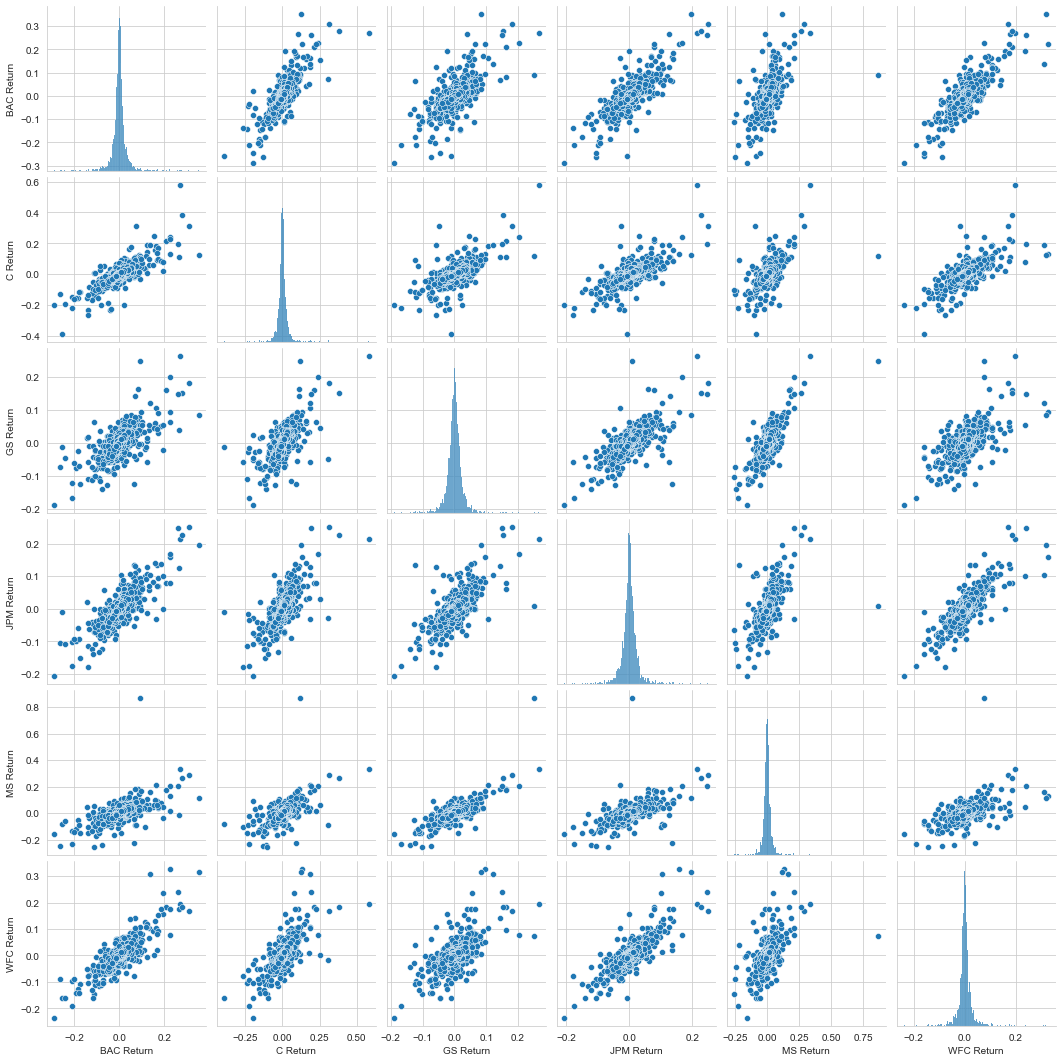

In [11]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
sns.set_style('whitegrid')

sns.pairplot(returns)


In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [14]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [15]:
returns[returns.index.year == 2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS Return', ylabel='Density'>

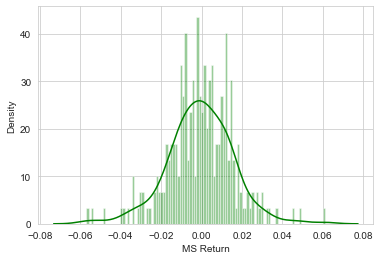

In [29]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='C Return', ylabel='Density'>

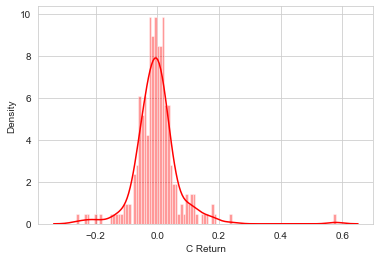

In [32]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [18]:
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Date'>

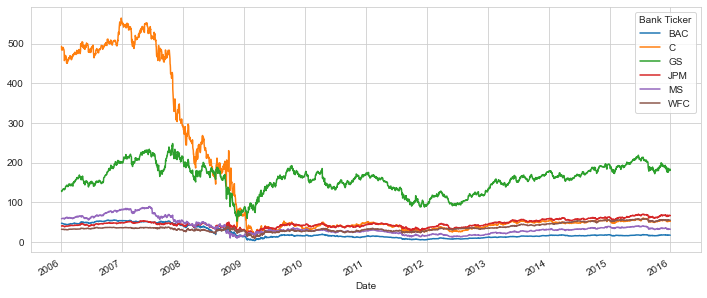

In [19]:
bank_stocks.xs('Close', axis=1, level=1).plot(figsize=(12,5))

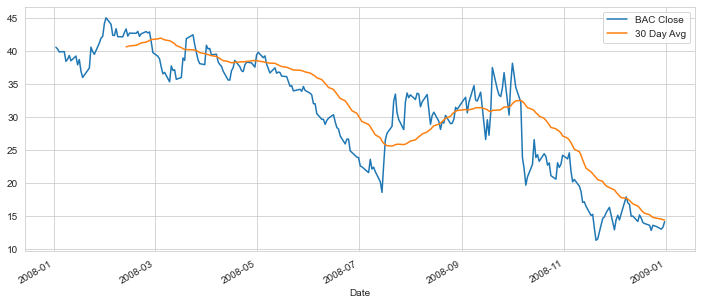

In [36]:
plt.figure(figsize=(12,5))
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()


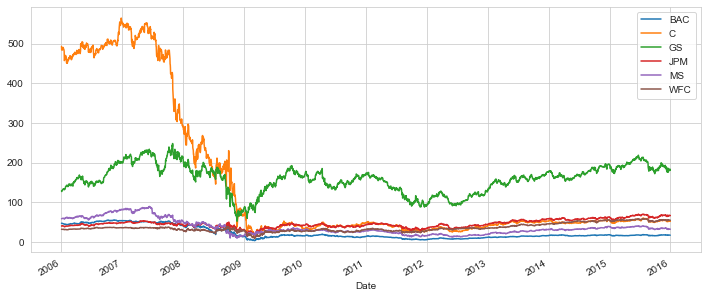

In [40]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,5),label=tick)
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

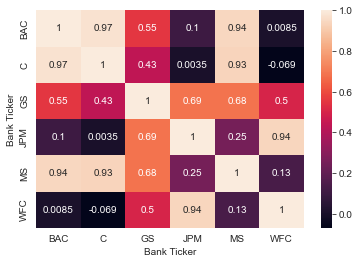

In [41]:
sns.heatmap(bank_stocks.xs('Close', axis=1, level=1).corr(),annot=True)

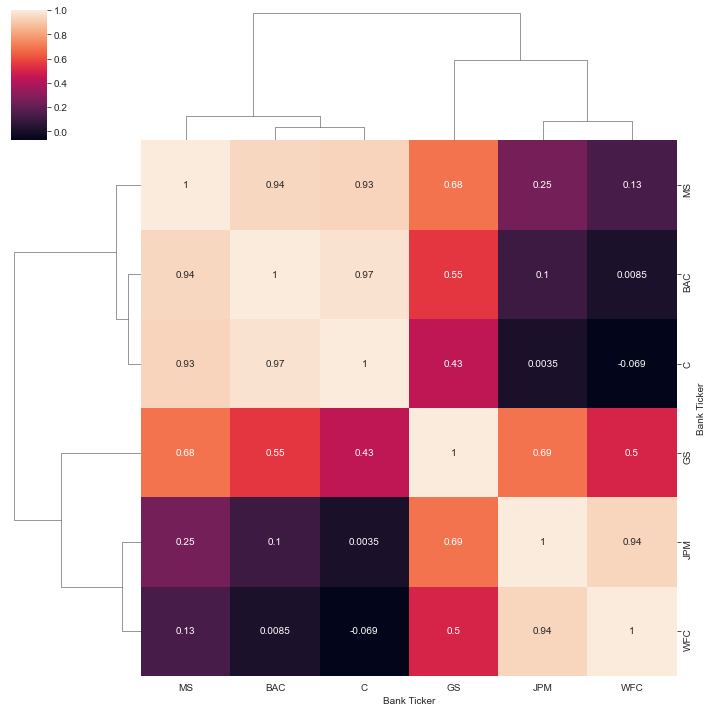

In [42]:
sns.clustermap(bank_stocks.xs('Close', axis=1, level=1).corr(),annot=True)

In [43]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [52]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [53]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll',title='Bollinger band plot')